In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [25]:
full_annualpath = "data/full_yearly.csv"
full_annual = pd.read_csv(full_annualpath)
full_annual
# drop index

,Year,Number of Fires,Avg. Acres Burned,Median Acres Burned,Avg. Fire Duration (Days),Median Fire Duration (Days),Mean Snow Depth (in),Max Snow Depth (in)
0,2013,14,2264.43,106.0,2.78,1.07,44.16,295
1,2014,9,10943.00,85.0,4.62,1.58,38.54,295
2,2015,13,5788.54,104.0,6.67,3.94,23.51,313
3,2016,30,161.07,87.5,2.26,1.18,54.93,311
4,2017,51,819.82,76.0,166.19,171.80,94.22,312
5,2018,27,5906.89,67.0,148.46,155.84,29.63,202
6,2019,21,82.05,50.0,3.31,0.70,84.85,330
7,2020,30,1967.23,77.0,2.08,0.73,40.44,332
8,2021,17,4254.88,118.0,11.89,1.92,43.72,322
9,2022,12,113.17,41.5,5.88,4.02,43.06,329


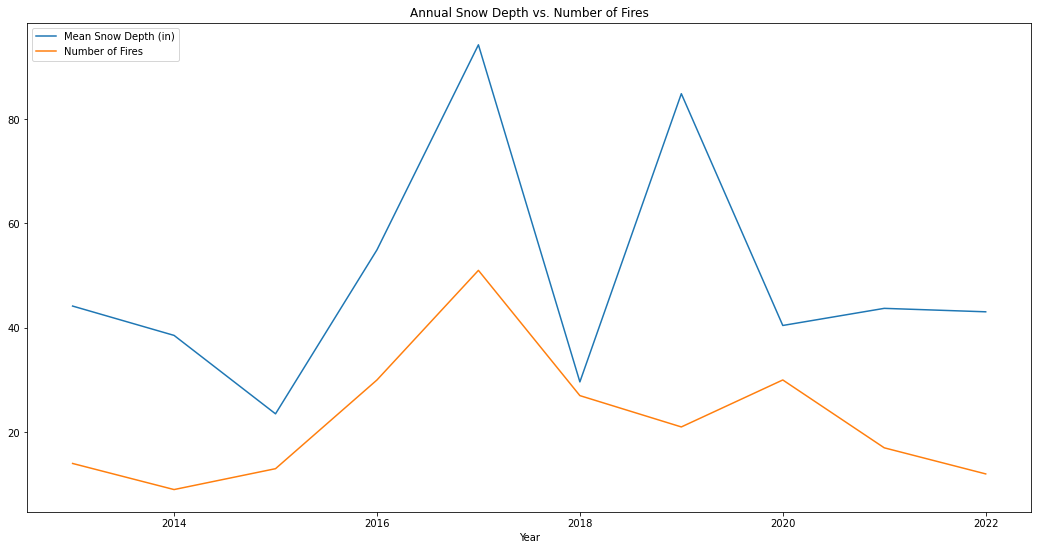

In [26]:
x_data = full_annual["Year"]
y_data = full_annual["Mean Snow Depth (in)"] 
y_data1 = full_annual["Number of Fires"]
plt.figure(figsize=(18,9))

snow_depth = plt.plot(x_data, y_data, label = "Mean Snow Depth (in)")
fire_numbers = plt.plot(x_data, y_data1, label = "Number of Fires")
plt.legend(loc = "upper left")
plt.xlabel("Year")
plt.title("Annual Snow Depth vs. Number of Fires")
plt.show()

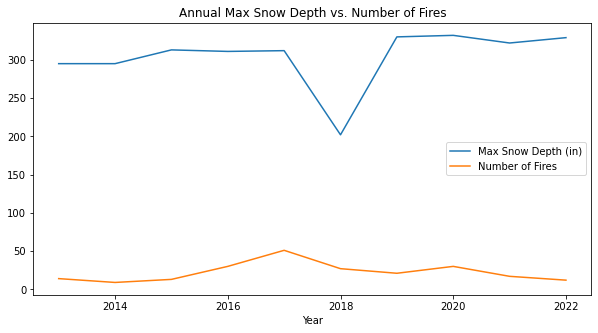

In [28]:
# Does a higher snowfall lessen the number of fires the following fire season?
fig2_x_data = full_annual["Year"]
fig2_y_data = full_annual["Max Snow Depth (in)"] 
fig2_y_data1 = full_annual["Number of Fires"]
plt.figure(figsize=(10,5))

max_snow_depth = plt.plot(fig2_x_data, fig2_y_data, label = "Max Snow Depth (in)")
fire_numbers = plt.plot(fig2_x_data, fig2_y_data1, label = "Number of Fires")
plt.legend(loc = "best")
plt.xlabel("Year")
plt.title("Annual Max Snow Depth vs. Number of Fires")
plt.show()

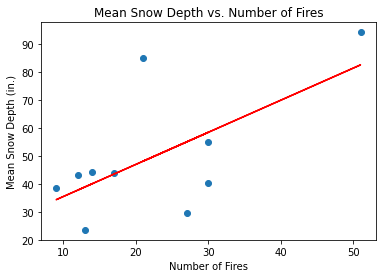

In [50]:
mean_snow_depth = full_annual["Mean Snow Depth (in)"]
fire_count = full_annual["Number of Fires"]

snow_slope, snow_int, snow_r, snow_p, snow_std_err = st.linregress(fire_count, mean_snow_depth)
snow_fit = snow_slope * fire_count + snow_int

plt.scatter(fire_count, mean_snow_depth)
plt.plot(fire_count, snow_fit, "r")
plt.title("Mean Snow Depth vs. Number of Fires")
plt.xlabel("Number of Fires")
plt.ylabel("Mean Snow Depth (in.)")

plt.show()

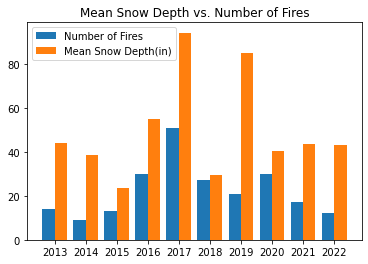

In [52]:
# Bar chart number of fires vs mean snow depth per year
x = full_annual["Year"]
y = full_annual["Number of Fires"]
z = full_annual["Mean Snow Depth (in)"]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2,y, 0.4, label='Number of Fires')
plt.bar(x_axis + 0.2,z, 0.4, label='Mean Snow Depth(in)')

plt.title("Mean Snow Depth vs. Number of Fires")
plt.xticks(x_axis,x)
plt.legend()
plt.show()

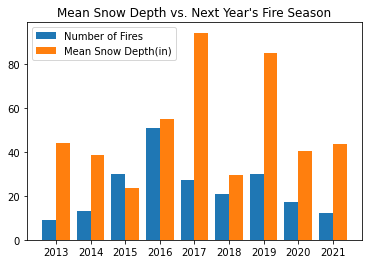

In [49]:
# Bar chart for mean snow depth vs the number of fires for the next year
offset_1 = full_annual.loc[full_annual["Year"] != 2013]
offset_2 = full_annual.loc[full_annual["Year"] != 2022]

x = offset_2["Year"]
y = offset_1["Number of Fires"]
z = offset_2["Mean Snow Depth (in)"]

x_axis = np.arange(len(x))

#Graph the two bar charts
plt.bar(x_axis - 0.2,y, 0.4, label='Number of Fires')
plt.bar(x_axis + 0.2,z, 0.4, label='Mean Snow Depth(in)')

#Labels and print
plt.title("Mean Snow Depth vs. Next Year's Fire Season")
plt.xticks(x_axis,x)
plt.legend()
plt.show()

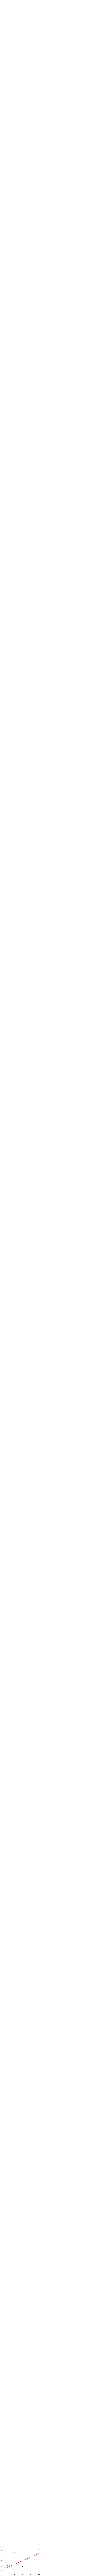

In [55]:
plt.scatter(y,z)

slope, intercept, r_value, p_value, snow_std_err = st.linregress(y, z)
snow_fit = slope * y + intercept
plt.plot(y, snow_fit, "-r")

plt.annotate(f"y = {slope}x + {intercept}", xy= [60,8000], fontsize = 15, color="red")
plt.annotate(f"r = {r_value}", xy = [60, 7000], fontsize = 15, color="red")
plt.annotate(f"p = {p_value}", xy = [60, 6000], fontsize = 15, color="red")

# print(snow_p)
plt.show()